In [9]:
# Import the pandas library and read and merge data from provided URLs using the common 'Mouse ID' column.
import pandas as pd
merged_df = pd.read_csv('https://raw.githubusercontent.com/GBov81/Module-5/main/Pymaceuticals/data/Mouse_metadata.csv')\
    .merge(pd.read_csv('https://raw.githubusercontent.com/GBov81/Module-5/main/Pymaceuticals/data/Study_results.csv'), on='Mouse ID')

# Display the number of unique mice IDs in the merged DataFrame.
print("Number of unique mice IDs in merged DataFrame:", merged_df['Mouse ID'].nunique())

# Check for mouse IDs with duplicate time points.
duplicate_mouse_ids = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID']

# Display the data associated with mouse IDs having duplicate time points.
print("Mouse IDs with duplicate time points:")
print(merged_df[merged_df['Mouse ID'].isin(duplicate_mouse_ids)])

# Create a new DataFrame with data removed for mouse IDs having duplicate time points.
cleaned_df = merged_df[~merged_df['Mouse ID'].isin(duplicate_mouse_ids)]

# Display the updated number of unique mice IDs in the cleaned DataFrame.
print("Number of unique mice IDs in the cleaned DataFrame:", cleaned_df['Mouse ID'].nunique())

# Create the summary statistics DataFrame.
summary_stats_df = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for comprehension and clarity.
summary_stats_df = summary_stats_df.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume SD',
    'sem': 'Tumor Volume SEM'
})
# Display the summary statistics DataFrame.
print("Summary Statistics:")
print(summary_stats_df)

Number of unique mice IDs in merged DataFrame: 249
Mouse IDs with duplicate time points:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21  

Potential outliers for Infubinol:
74    36.321346
Name: Tumor Volume (mm3), dtype: float64



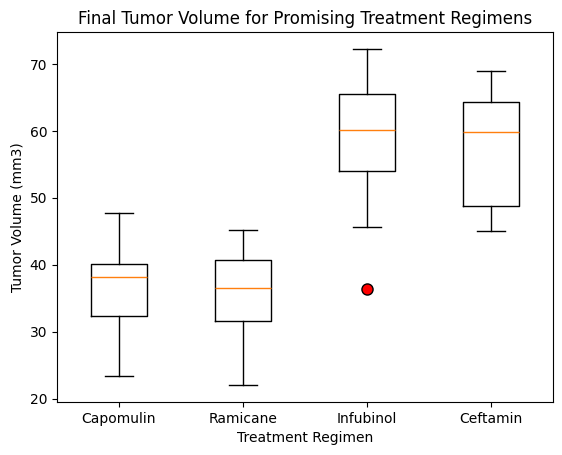

In [10]:
# Import the Matplotlib library for data visualization.
import matplotlib.pyplot as plt

# Get the last time point for each mouse and merge the last timepoint DataFrame with the original.
last_timepoint_df = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
merged_df = pd.merge(cleaned_df, last_timepoint_df, on=['Mouse ID', 'Timepoint'], how='inner')

# Define the treatment regimens and create a list of tumor volume data for each treatment.
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data = [merged_df.loc[merged_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatments]

# Calculate and print potential outliers.
outliers = {treatment: data[(data < (data.quantile(0.25) - 1.5 * (data.quantile(0.75) - data.quantile(0.25)))) |
                            (data > (data.quantile(0.75) + 1.5 * (data.quantile(0.75) - data.quantile(0.25))))] 
            for treatment, data in zip(treatments, tumor_volume_data) if not data.empty}

for treatment, potential_outliers in outliers.items():
    if not potential_outliers.empty:
        print(f"Potential outliers for {treatment}:\n{potential_outliers}\n")

# Generate and display a box plot.
plt.boxplot(tumor_volume_data, labels=treatments, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8})
plt.title('Final Tumor Volume for Promising Treatment Regimens')
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

